In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

最优的聚类结果需要符合以 下两个假设。

+ “簇中心点”（cluster center）是属于该簇的所有数据点坐标的算术平均值。

+ 一个簇的每个点到该簇中心点的距离，比到其他簇中心点的距离短。

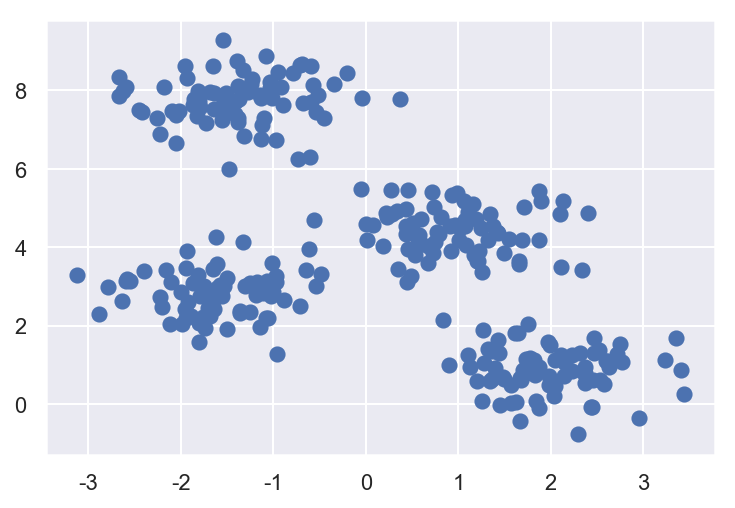

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(
    n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

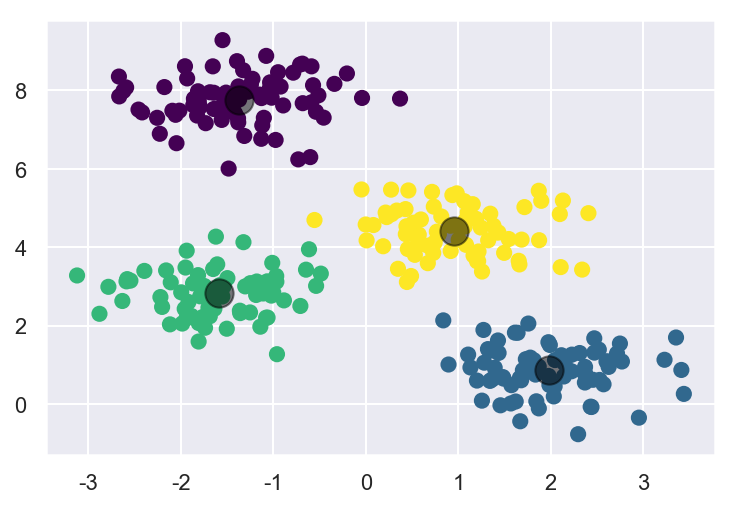

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## 期望最大化算法

Expectation–Maximization

手写 k-means 聚类算法。

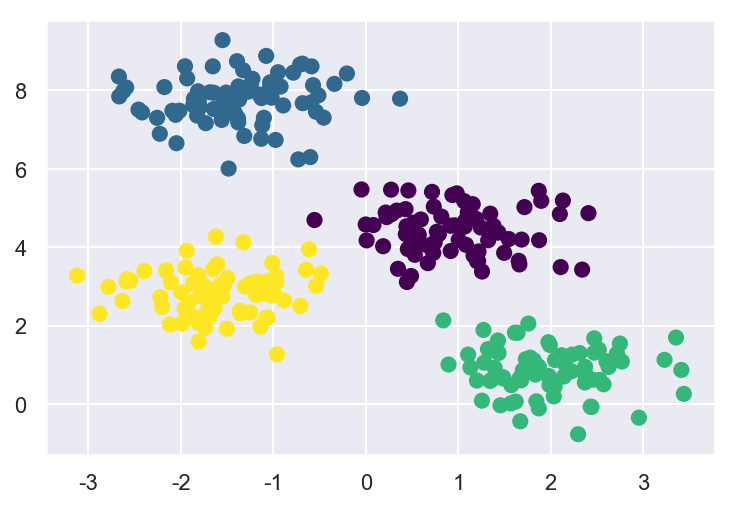

In [5]:
from sklearn.metrics import pairwise_distances_argmin


def find_clusters(X, n_clusters, rseed=2):
    # 1、随机选择簇中心点
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a、基于最近的中心指定标签
        labels = pairwise_distances_argmin(X, centers)

        # 2b、根据点的平均值找到新的中心
        new_centers = np.array(
            [X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c、确认收敛
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels


centers, labels = find_clusters(X, 4)
plt.scatter(
    X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

### 使用期望最大化算法时的注意事项

在使用期望最大化算法时，需要注意几个问题。

+ 可能不会达到全局最优结果。
+ 簇数量必须事先定好。
+ k-means 算法只能确定线性聚类边界。

下面这个例子展示了聚类中心如果选择不好的效果。

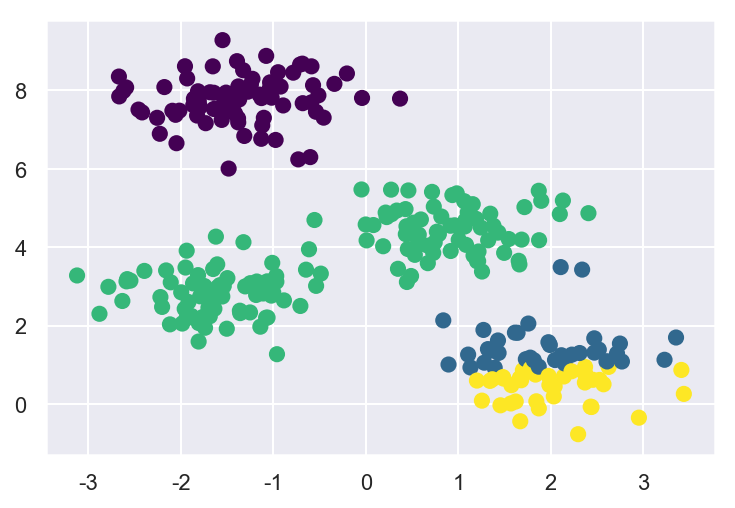

In [6]:
# 可能不会达到全局最优结果
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(
    X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

聚类中心的个数指定不好的效果。

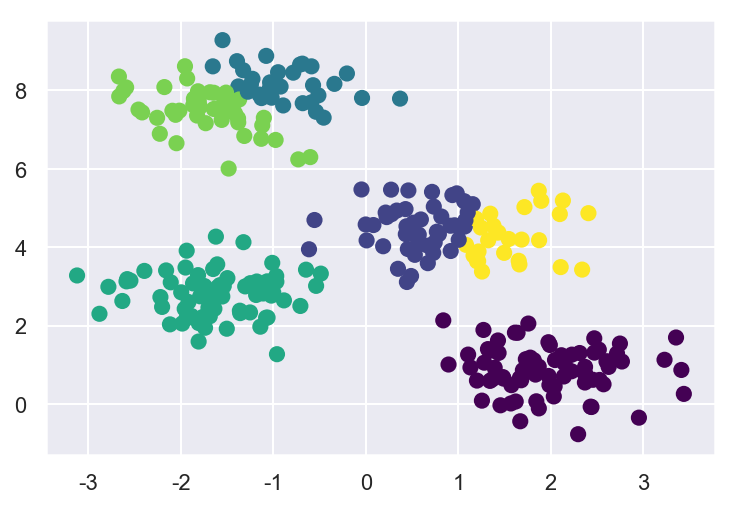

In [7]:
# 6 是个不好的聚类中心
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

下面这个数据集不适合使用 k-means 聚类算法。

In [8]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

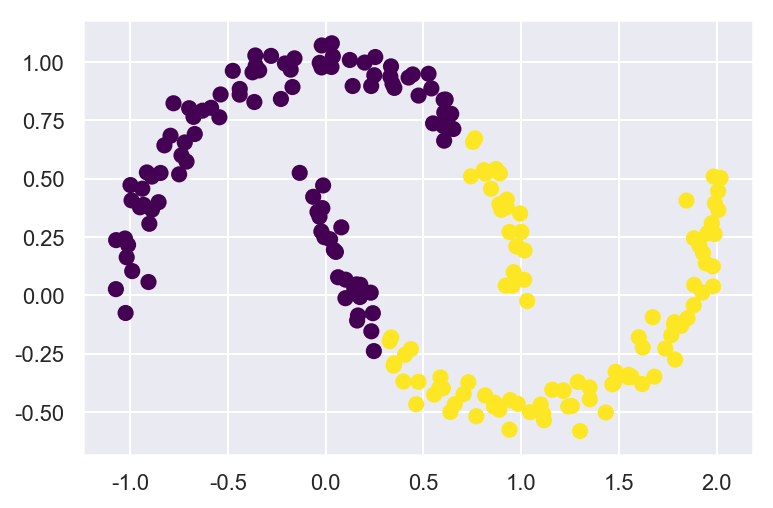

In [9]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

k-means 算法只能确定线性聚类边界。

## 谱聚类

使用最近邻图（the graph of nearest neighbors）来计算数据的高维表示， 然后用 k-means 算法分配标签。

In [10]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(
    n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


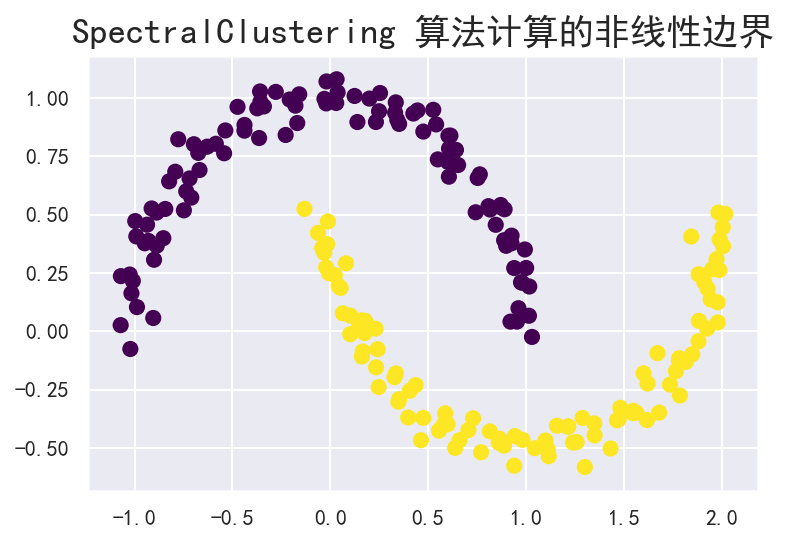

In [11]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

plt.title('SpectralClustering 算法计算的非线性边界',fontsize=18)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

可以看到，通过核变换方法，核 k-means 就能够找到簇之间复杂的非线性边界了。